<a href="https://colab.research.google.com/github/kiplangat-david/Bank-Payments-Fraud-Detection/blob/main/FRAUD_DETECTION_mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group - Wakanda**
1. Peter Kirimi - **Team Lead**
2. Esther Roberts
3. Farnadis Kanja
4. David Kiplagat
5. Faith Rotich
6. Mutura Kuria

# Fraud Detection on Bank Payments

## Specifying the Question


1. **Build a model that predicts fraud detection on bank payments**

     ***Others***

2. Analyze and determine the industries that are prone to fraud. 

3. Determine the monetary threshold at which fraud is likely to occur. 

4. Determine the age group that is at risk of fraudulent behavior in banking. 

5. Determine which gender is at risk of fraudulent behavior. 

6. Determine what percentage of all transactions are fraudulent.





## Defining the Metric for Success

This project will be successful if Our model achieve at least 80% ROC_UC

## Understanding the Context
Fraudulent behavior can be seen across many different fields such as e-commerce, healthcare, payment and banking systems. Fraud is a billion-dollar business and it is increasing every year. The PwC global economic crime survey of 2018 found that half (49 percent) of the 7,200 companies they surveyed had experienced fraud of some kind.

Even if fraud seems to be scary for businesses it can be detected using intelligent systems such as rules engines or machine learning.For these type of problems ML comes for help and reduce the risk of frauds and the risk of business to lose money.

## Recording the Experimental Design


1. Import Libraries

2. Load Dataset

3. Perform Data Cleaning

4. Exploratory Data Analysis

5. Data Preprocessing

6. Model Training

7. Model Evaluation

8. Follow up Questions

9. Conclusions

## Data Relevance
**Banksim dataset**
We detect the fraudulent transactions from the *Banksim dataset*. This synthetically generated dataset consists of payments from various customers made in different time periods and with different amounts. 

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Load Data

As we can see in the first rows below the **dataset** has **9 feature columns** and **a target column**. 

The **feature columms** are :

**Step**: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.

**Customer**: This feature represents the customer id

**zipCodeOrigin**: The zip code of origin/source.

**Merchant**: The merchant's id

**zipMerchant**: The merchant's zip code

**Age**: Categorized age

0: <= 18,

1: 19-25,

2: 26-35,

3: 36-45,

4: 46:55,

5: 56:65,

6: > 65

U: Unknown

**Gender**: Gender for customer

E : Enterprise,

F: Female,

M: Male,

U: Unknown

**Category**: Category of the purchase. 
We'll see them later in the analysis.

**Amount**: Amount of the purchase

**Fraud**: Target variable which shows if the transaction
 fraudulent(1) or benign(0)

In [ ]:
# Loading our dataset
data = pd.read_csv('/content/bs140513_032310.csv')

## Data exploration

In [ ]:
#preview top 5 records
data.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0


In [ ]:
#preview bottom 5 records
data.tail(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
25920,10,'C1668825144','6','F','28007','M348934600','28007','es_transportation',39.04,0.0
25921,10,'C179748485','2','M','28007','M348934600','28007','es_transportation',39.41,0.0
25922,10,'C767740583','2','F','28007','M348934600','28007','es_transportation',49.01,0.0
25923,10,'C1929968596','2','F','28007','M348934600','28007','es_transportation',67.37,0.0
25924,10,'C1530262146','2','M',NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# preview random 5 records
data.sample(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
20870,8,'C290140685','3','F','28007','M348934600','28007','es_transportation',69.50,0.0
21025,8,'C1711634686','3','F','28007','M348934600','28007','es_transportation',29.41,0.0
22932,9,'C1804573810','2','F','28007','M1823072687','28007','es_transportation',15.46,0.0
18859,7,'C747175090','5','F','28007','M348934600','28007','es_transportation',11.91,0.0
16050,6,'C1017469037','2','M','28007','M348934600','28007','es_transportation',32.22,0.0


Our dataset contains expected rows and column records

In [ ]:
#check number of rows and columns
print('Our dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

Our dataset has 25925 rows and 10 columns


In [ ]:
#check data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925 entries, 0 to 25924
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         25925 non-null  int64  
 1   customer     25925 non-null  object 
 2   age          25925 non-null  object 
 3   gender       25925 non-null  object 
 4   zipcodeOri   25924 non-null  object 
 5   merchant     25924 non-null  object 
 6   zipMerchant  25924 non-null  object 
 7   category     25924 non-null  object 
 8   amount       25924 non-null  float64
 9   fraud        25924 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.0+ MB


 - Our dataset contain 115518 instances and 10 attributes. The first 9 variables will be our independent variables and the last (fraud) will be our dependent (target variable)
 - Our dataset contain integer, object and float datatypes
 - We will convert age column datatype from object to integer as it will be useful in exploratory data analysis
 

## Data Cleansing

Here we will check and deal with:
 - Removing unnecessary characters in column values
 - Changing datatypes
 - Missing values
 - Duplicates
 - Outliers & anomalies

### Removing unnecessary characters in column values

For uniformity we remove the apostrophes and any other unnecessary character in our dataset

In [ ]:
data.replace('\'','', regex=True, inplace=True) 

In [ ]:
# previewing our dataset
data.head(3)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0.0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0.0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0.0


In [ ]:
data.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud          float64
dtype: object

In [ ]:
# previewing our dataset
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0.0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0.0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0.0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0.0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0.0


### Missing Values

In [ ]:
# Identifying the Missing values in our dataset
data.isnull().sum()


step           0
customer       0
age            0
gender         0
zipcodeOri     1
merchant       1
zipMerchant    1
category       1
amount         1
fraud          1
dtype: int64

Our dataset has two missing values, one in amount and the other in fraud columns

We will drop the null values, we won't lose any information

In [ ]:
data=data.dropna()
data.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

### Duplicates

In [ ]:
# checking for Duplicates
data.duplicated().sum()

0

Our dataset has no dupliicates

### Anomalies

In [ ]:
# checking for  anomalies
print('step',data.step.unique())
print('customer',data.customer.unique())
print('age',data.age.unique())
print('gender',data.gender.unique())
print('merchant',data.merchant.unique())
print('category',data.category.unique())
print('amount',data.amount.unique())
print('fraud',data.fraud.unique())

step [ 0  1  2  3  4  5  6  7  8  9 10]
customer ['C1093826151' 'C352968107' 'C2054744914' ... 'C86466018' 'C1097812196'
 'C1728122351']
age ['4' '2' '3' '5' '1' '6' 'U' '0']
gender ['M' 'F' 'E' 'U']
merchant ['M348934600' 'M1823072687' 'M50039827' 'M1888755466' 'M1053599405'
 'M85975013' 'M480139044' 'M692898500' 'M348875670' 'M151143676'
 'M840466850' 'M1741626453' 'M1535107174' 'M855959430' 'M349281107'
 'M209847108' 'M2122776122' 'M1873032707' 'M2011752106' 'M857378720'
 'M1198415165' 'M1748431652' 'M980657600' 'M1352454843' 'M117188757'
 'M547558035' 'M17379832' 'M1649169323' 'M1946091778' 'M97925176'
 'M923029380' 'M1353266412' 'M1842530320' 'M677738360' 'M1313686961'
 'M732195782' 'M1600850729' 'M1872033263' 'M3697346' 'M495352832'
 'M1400236507' 'M1294758098' 'M1913465890' 'M45060432' 'M78078399'
 'M2080407379' 'M1788569036' 'M1416436880']
category ['es_transportation' 'es_health' 'es_otherservices' 'es_food'
 'es_hotelservices' 'es_barsandrestaurants' 'es_tech' 'es_sportsandto

Our dataset has no anomalies. 'U' in age and gender columns represent the unknown values and so we will not drop them

In [ ]:
age = data[data['age'] == 'U'].index
# Delete these row indexes from dataFrame
data.drop(age , inplace=True)

In [ ]:
gender = data[data['gender'] == 'U'].index
# Delete these row indexes from dataFrame
data.drop(gender , inplace=True)

In [ ]:
print(data['age'].unique())
print(data['gender'].unique())

['4' '2' '3' '5' '1' '6' '0']
['M' 'F']


### Outliers

Here, we will visualize our dataset numerical features and check & deal with outliers

In [ ]:
# saving visualization
#changes the layout first before saving the plot
def vizSave(fname):
  return plt.tight_layout()
  return plt.savefig(fname)
  return plt.show()

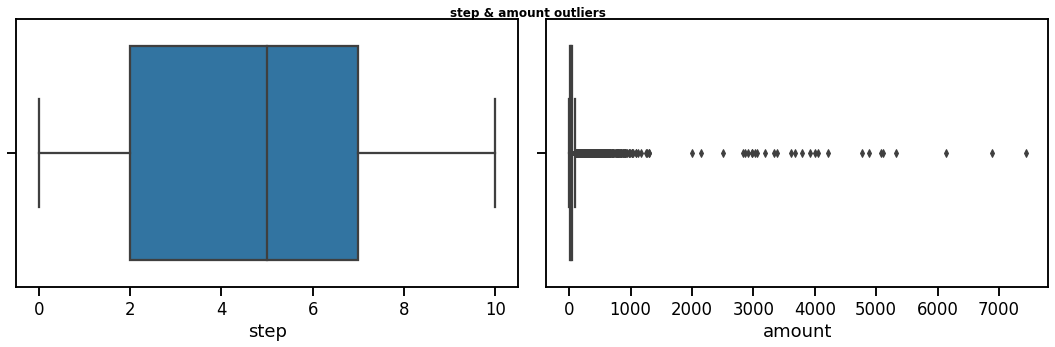

In [ ]:
# Boxplot to idnetify outliers in step and amount columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('step & amount outliers',weight='bold')
sns.boxplot(ax=axes[0],x=data['step'])
sns.boxplot(ax=axes[1],x=data['amount'])
sns.set_context('talk')


# saving visualization
vizSave("Outliers.png")

-The step column has no outliers

-Amount column contain numerous outliers. However, these outliers might be true observations since transactions vary depending on various factors such as standards of living and therefore we will not drop them

## Data preprocessing

Preparing our data further for EDA

### Transform categorical features into numerical values

In [ ]:
# turning object columns type to categorical for easing the transformation process
col_categorical = data.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data[col] = data[col].astype('category')
# categorical values ==> numeric values
data[col_categorical] = data[col_categorical].apply(lambda x: x.cat.codes)
data.head(3)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,178,4,1,0,29,0,12,4.55,0.0
1,0,2317,2,1,0,29,0,12,39.68,0.0
2,0,1918,4,0,0,17,0,12,26.89,0.0


### Changing datatypes

In [ ]:
data.dtypes

step             int64
customer         int16
age               int8
gender            int8
zipcodeOri        int8
merchant          int8
zipMerchant       int8
category          int8
amount         float64
fraud          float64
dtype: object

In [ ]:
# convert our dataset to contain the correct datatypes
data=data.convert_dtypes()
# print new datatypes
print(data.dtypes)

step             Int64
customer         Int16
age               Int8
gender            Int8
zipcodeOri        Int8
merchant          Int8
zipMerchant       Int8
category          Int8
amount         float64
fraud            Int64
dtype: object


### Dropping unnecessary columns
There are only one unique zipCode values (28007) so we will drop them.

In [ ]:
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data = data.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [ ]:
# Previewing our dataset
data.head(3)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,178,4,1,29,12,4.55,0
1,0,2317,2,1,29,12,39.68,0
2,0,1918,4,0,17,12,26.89,0


# Exploratory Data Analysis

**Fraud data** is imbalanced like you see in the plot below and from the count of instances. To balance the dataset one can perform oversample or undersample techniques.

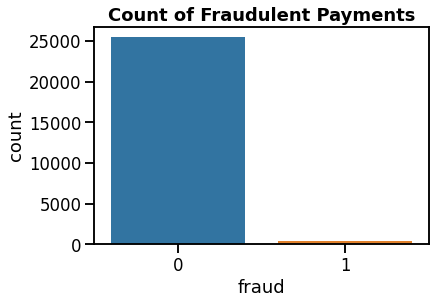

Number of normal examples:  98.39901001585521
Number of fradulent examples:  1.6009899841447854


In [ ]:
#countplot showing count of fraudulent payments
# Create two dataframes with fraud and non-fraud data 
fraud = data.loc[data.fraud == 1] 
non_fraud = data.loc[data.fraud == 0]

sns.countplot(x='fraud',data=data)
plt.title('Count of Fraudulent Payments',weight='bold')
plt.show()
print('Number of normal examples: ',non_fraud.fraud.count()/len(data['fraud'])*100)
print('Number of fradulent examples: ',fraud.fraud.count()/len(data['fraud'])*100)


Text(0, 0.5, 'No. of Frauds')

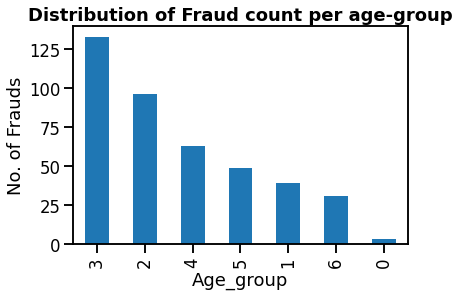

In [ ]:
#Distribution of fraud transactions per age group
data.loc[data.fraud == 1,'age'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraud count per age-group', weight='bold')
plt.xlabel('Age_group')
plt.ylabel('No. of Frauds')


The highest cases of fraud lie in category '3' (age 36-45)

Text(0.5, 1.0, 'Age vs Amount')

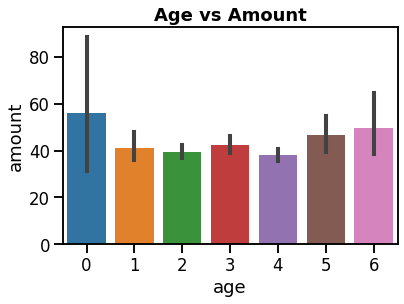

In [ ]:
#Age vs amount
sns.barplot(x='age',y='amount',data=data)
plt.title('Age vs Amount',weight='bold')

Larger amount of transactions are done by individuals under 18 years (group 0)

Text(0.5, 1.0, 'Distribution of age_groups vs fraud')

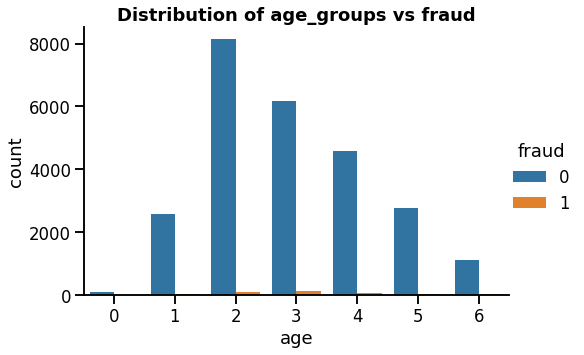

In [ ]:
#Distribution of age vs fraud
#fraud=0-(no)
#fraud=1 - (yes)
sns.catplot(x='age', hue='fraud', data=data, kind='count',aspect=1.5)
plt.title('Distribution of age_groups vs fraud',weight='bold')

fraud is  common across the all age groups. Age category '2' (26-35) is more involved.

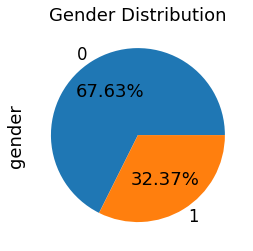

In [ ]:
#Distribution of gender
data.loc[data.fraud == 1,'gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Gender Distribution')
plt.show()


There are more female fraudsters  

In [ ]:
print("Mean feature values per category",data.groupby('category')['amount','fraud'].mean())

Mean feature values per category                amount     fraud
category                       
0           42.760321  0.017825
1           45.458649  0.000000
2           61.898435  0.019169
3           35.893027  0.000000
4          159.322835  0.151408
5          160.044386  0.192982
6          149.405824  0.175824
7           43.161322  0.019157
8          318.478889  0.944444
9          121.247033  0.175824
10         206.832410  0.446043
11         114.769449  0.047244
12          27.014609  0.000000
13        2513.481633  0.693878
14          71.461045  0.068776


Text(0.5, 1.0, 'Fraud distribution grouped by category')

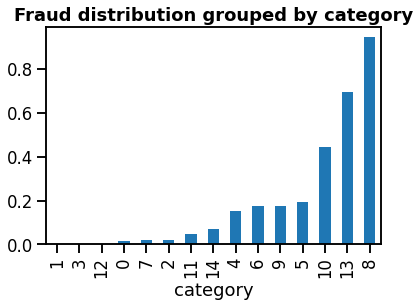

In [ ]:
#Fraud distribution grouped by category
data.groupby('category')['fraud'].mean().sort_values(ascending=True).plot(kind='bar')
plt.title('Fraud distribution grouped by category',weight='bold')


We can see the mean amount and fraud percent by category below. Looks like leisure and the travel is the most selected categories for fraudsters. Fraudsters chose the categories which people spend more on average. Let's confirm this hypothesis by checking the fraud and non-fraud amount transacted.

Our hypothesis for fraudsters choosing the categories which people spend more is only partly correct, but as we can see in the table below we can confidently say that a fraudulent transaction will be much more (about four times or more) than average for that category.

In [ ]:
# Create two dataframes with fraud and non-fraud data 
pd.concat([fraud.groupby('category')['amount'].mean(),non_fraud.groupby('category')['amount'].mean(),\
           data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
12,NaN,27.014609,0.000000
3,NaN,35.893027,0.000000
0,145.496000,40.895789,1.782531
7,158.890000,40.900996,1.915709
1,NaN,45.458649,0.000000
14,240.824200,58.952688,6.877579
2,185.795000,59.477003,1.916933
10,365.688710,78.922143,44.604317
9,304.653125,82.120400,17.582418
8,331.707059,93.600000,94.444444


In [ ]:

data.groupby('fraud')['category'].value_counts()


fraud  category               
0.0    'es_transportation'        119851
       'es_food'                    3976
       'es_wellnessandbeauty'       3735
       'es_health'                  2742
       'es_barsandrestaurants'      2402
       'es_hyper'                   2137
       'es_fashion'                 1564
       'es_sportsandtoys'            758
       'es_tech'                     536
       'es_home'                     460
       'es_otherservices'            342
       'es_hotelservices'            328
       'es_contents'                 193
       'es_travel'                    58
       'es_leisure'                   11
1.0    'es_sportsandtoys'            572
       'es_health'                   452
       'es_wellnessandbeauty'        202
       'es_travel'                   172
       'es_leisure'                  144
       'es_hotelservices'            114
       'es_home'                      84
       'es_hyper'                     84
       'es_otherservices' 

Average amount spend it categories are similar; except for the travel category which goes very high.

No handles with labels found to put in legend.


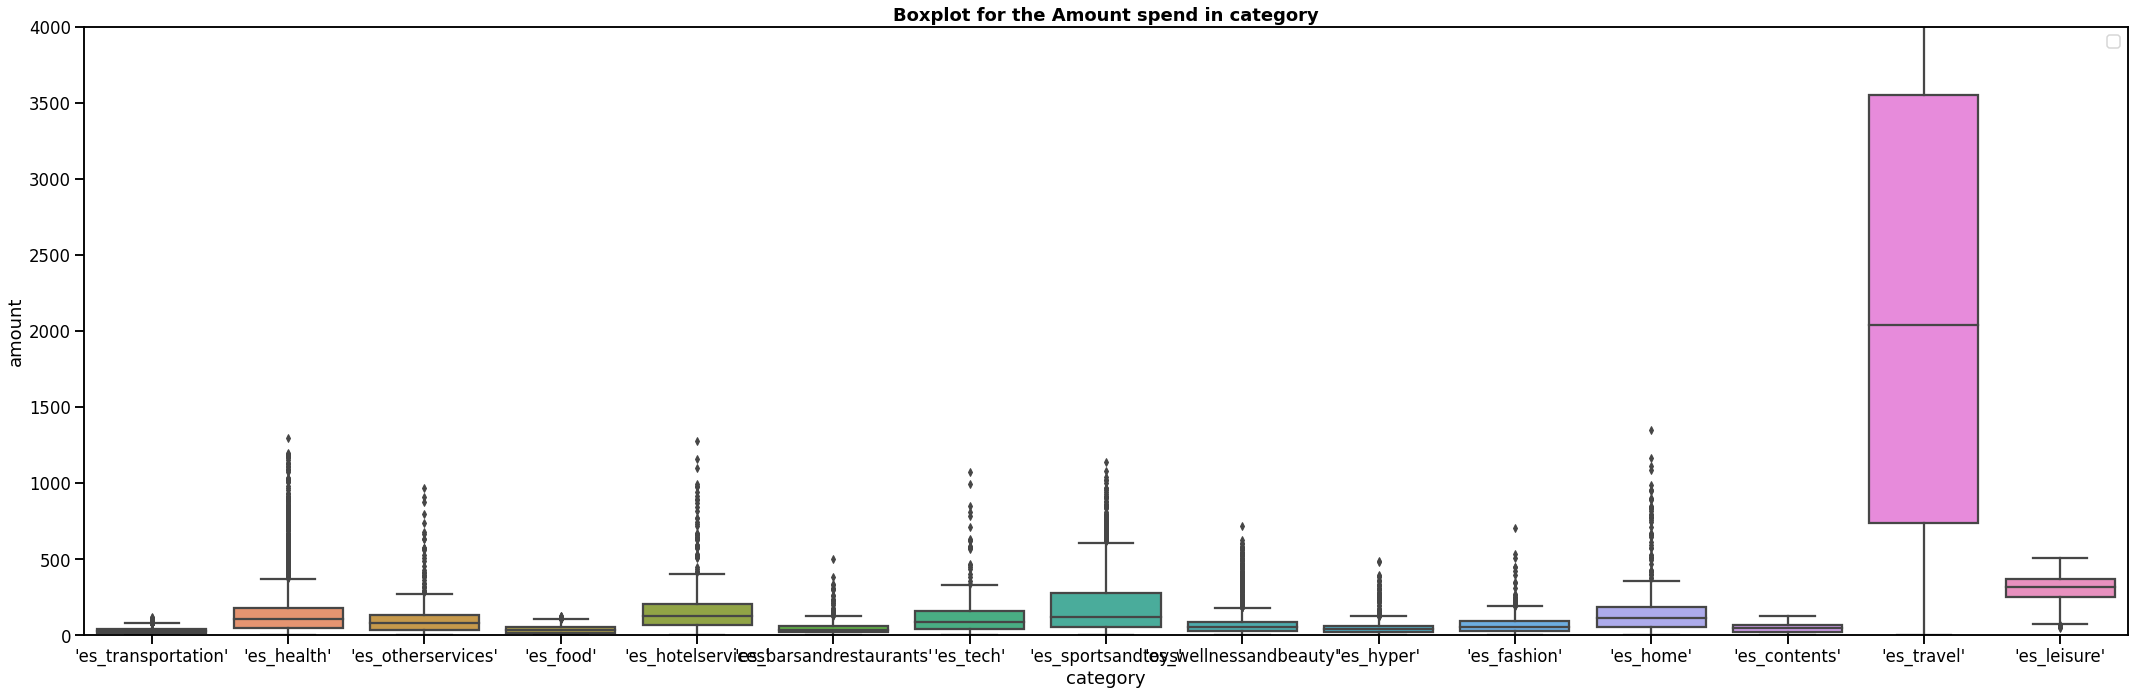

In [ ]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title("Boxplot for the Amount spend in category",weight='bold')
plt.ylim(0,4000)
plt.legend()
vizSave('Amounts in fraud and non-fraud data.jpeg')
plt.show()

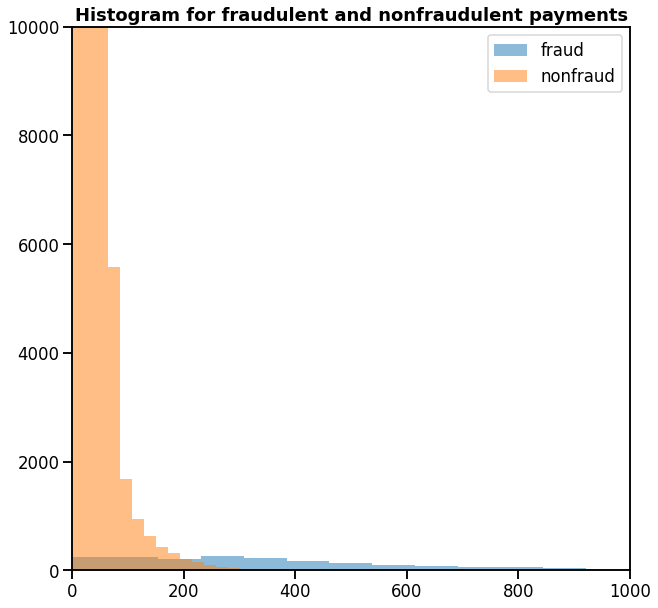

In [ ]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.figure(figsize=(10,10))
plt.hist(fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(non_fraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title('Histogram for fraudulent and nonfraudulent payments',weight='bold')
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

Again we can see in the histogram below the fradulent transactions are less in count but more in amount.

In [ ]:
print((data.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
2    2       1.167173
4    4       1.353093
1    1       1.495399
5    5       1.735127
3    3       2.109102
6    6       2.712161
0    0       3.092784


Looks like fraud occurs more in ages equal and below 18(0th category). Can it be because of fraudsters thinking it would be less consequences if they show their age younger, or maybe they really are young.

In [ ]:
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)



,step,customer,age,gender,merchant,category,amount,fraud
step,1.0,-0.00447,0.00108,0.00441,-0.03896,0.004317,-0.001163,-0.001544
customer,-0.00447,1.0,0.002312,-0.008008,-0.004757,0.005653,-0.005267,-0.0184
age,0.00108,0.002312,1.0,0.01873,0.001269,-0.008113,0.01087,0.01644
gender,0.00441,-0.008008,0.01873,1.0,-0.007843,0.01071,-0.0126,-0.03251
merchant,-0.03896,-0.004757,0.001269,-0.007843,1.0,-0.003975,0.04606,0.08483
category,0.004317,0.005653,-0.008113,0.01071,-0.003975,1.0,-0.06959,-0.1219
amount,-0.001163,-0.005267,0.01087,-0.0126,0.04606,-0.06959,1.0,0.4709
fraud,-0.001544,-0.0184,0.01644,-0.03251,0.08483,-0.1219,0.4709,1.0


- Coefficient of one accross the diagonal shows that a variable perfectly correlates to itself
- Fraud and amount have positive correlations. This fraudulent actions increase with increase in amounts
- Fraud and step has weak negative correlations

In [ ]:
data.groupby('fraud')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud,,,,,,,,
0,25445.0,32.391263,38.117929,0.01,13.66,26.62,42.24,2144.86
1,414.0,588.380266,990.113782,4.32,159.98,317.97,573.39,7432.48


In [ ]:
data.head(2)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,178,4,1,29,12,4.55,0
1,0,2317,2,1,29,12,39.68,0


# Declare feature and target variables

In [ ]:
#split dataset into feature and target variables
X = data.drop(['fraud'],1)
y = data['fraud']
print(X.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       178    4       1        29        12    4.55
1     0      2317    2       1        29        12   39.68
2     0      1918    4       0        17        12   26.89
3     0      1375    3       1        29        12   17.25
4     0      3011    5       1        29        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: Int64


# Oversampling with SMOTE

Fraud data is imbalanced from the count of instances. To balance the dataset one can perform oversample. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line

In [ ]:
y[y==1].count()

414

In [ ]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
y = pd.DataFrame(y)
print(y[0].value_counts())

ValueError: ignored

In [ ]:
#check if data is balanced
print(y.value_counts())

0    25445
1      414
Name: fraud, dtype: Int64


Our data is now balanced. We can proceed to the next step

# Split data into separate training and test set

-We will partition our dataset into 80-20 sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

# Feature Scaling

We will use StandardScaler so that our feature values are centered around the mean with a unit standard deviation

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model building

We will train the following machine learning algorithms

**We shall use Logistic regression as our baseline model.**
1. RandomForestClassifier
2. KNeighborsClassifier
3. Support Vector Machine
4. GradientBoostingClassifier

We will then choose the best algorithm and tune it


**Metric selection for imbalanced data**

We are going to use ROC-AUC score and classification report as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 1.2% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

First, we shall create a baseline model. A baseline provides a point of comparison for the more advanced methods that you evaluate later. We chose Logistic Regression algorithm for this.

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
#fit our model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
#make predictions
y_pred = LogReg.predict(X_test)
#evaluate the model 
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
print(roc_auc_score(y_test, y_pred))

0.9241705309320968


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93     27819
         1.0       0.95      0.90      0.92     27819

    accuracy                           0.92     55638
   macro avg       0.93      0.92      0.92     55638
weighted avg       0.93      0.92      0.92     55638



# RandomForestClassifier

In [ ]:
#train model
#random forest
rf = RandomForestClassifier()
#
#fit the model
rf.fit(X_train,y_train)

#predictions
y_pred = rf.predict(X_test)

#print model accuracy

print('Model roc score :', roc_auc_score(y_test, y_pred))

print('Classification Report ;', classification_report(y_test, y_pred))


Model roc score : 0.9944102951220389
Classification Report ;               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     27819
         1.0       0.99      1.00      0.99     27819

    accuracy                           0.99     55638
   macro avg       0.99      0.99      0.99     55638
weighted avg       0.99      0.99      0.99     55638



# KNeighborsClassifier

In [ ]:
# instantiate the model
knn = KNeighborsClassifier()

# fit the model to the training set
knn.fit(X_train, y_train)

#make predictions
y_pred = knn.predict(X_test)

y_pred

#print model accuracy
print('Model roc score :', roc_auc_score(y_test, y_pred))

print('Classification Report ;', classification_report(y_test, y_pred))


Model roc score : 0.9825658722455874
Classification Report ;               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     27819
         1.0       0.97      0.99      0.98     27819

    accuracy                           0.98     55638
   macro avg       0.98      0.98      0.98     55638
weighted avg       0.98      0.98      0.98     55638



# Support Vector Machine

In [ ]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model roc score :', roc_auc_score(y_test, y_pred))

print('Classification Report ;', classification_report(y_test, y_pred))

Model roc score : 0.9714044358172471
Classification Report ;               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     27819
         1.0       0.96      0.98      0.97     27819

    accuracy                           0.97     55638
   macro avg       0.97      0.97      0.97     55638
weighted avg       0.97      0.97      0.97     55638



# GradientBoostingClassifier

In [ ]:
##impport the ckassifier and instantiate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

#train the model
gb.fit(X_train,y_train)

 #predict test set results
y_pred = gb.predict(X_test)

#evaluate the model
gradientboost_accuracy = roc_auc_score(y_test,y_pred) 
print('Accuracy =',gradientboost_accuracy)
print('***************************************\n')
print('Classification Report ;', classification_report(y_test, y_pred))

Accuracy = 0.9753046479025127
***************************************

Classification Report ;               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     27819
         1.0       0.97      0.98      0.98     27819

    accuracy                           0.98     55638
   macro avg       0.98      0.98      0.98     55638
weighted avg       0.98      0.98      0.98     55638



Our baseline model seems to perform better than any of other models at 92% accuracy. The other models are overfitting. Let us improve the perfomance by tuning our best model using hyperparameter tuning.

# Hypeparameter tuning

In [ ]:
# defining models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.925713 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.925713 (0.001420) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.923052 (0.002978) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924813 (0.001401) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.925713 (0.001420) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.922821 (0.002951) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924784 (0.001393) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.925707 (0.001415) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.923210 (0.003231) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924784 (0.001402) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.925684 (0.001417) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.923307 (0.003418) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924759 (0.001395) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.925448 (0.001433) wit

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.925713 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.925713 (0.001420) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.923262 (0.003130) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.925713 (0.001420) with: {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.923262 (0.003130) with: {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
0.925713 (0.001420) with: {'C': 1.0, 'penalty': 'none', 'solver': 'newton-cg'}
0.923262 (0.003130) with: {'C': 1.0, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'none', 'solver': 'liblinear'}
0.925713 (0.001420) with: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
0.923262 (0.003130) with: {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'none', 'solver': 'liblinear

# Conclusion

Logistic regression seems to be the best model with an accuracy of 92%. With hyperparameter tuning, We expect to improve the performance of the model.

# Recommendation

Being an industry that is growing and constantly vulnerable to fraud, we reccommend more specific and timely data on an areas of vulnerability. This data may include... Location, time and other factors that makes one vulnerable.

*   Raise awareness on specific industries that are prone to fraud and work with the industries to reduce the vulnerabilities.

*   Introduce tighter measures on the ages and categories that have been found to have greater appetite for fraud.





